# Support Vector Regression (SVR)

## Importing the libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [49]:
dataset = pd.read_csv('/content/Ice_cream selling data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1:].values

## Splitting the dataset into the Training set and Test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [53]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3.99  0.95]
 [29.98 32.28]
 [ 2.42  0.79]
 [ 6.35  3.78]
 [ 8.52  8.94]
 [17.83 12.57]
 [11.75  7.41]
 [22.6  22.84]
 [24.82 25.37]
 [20.29 13.28]]


## Evaluating the Model Performance

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.885583423597308

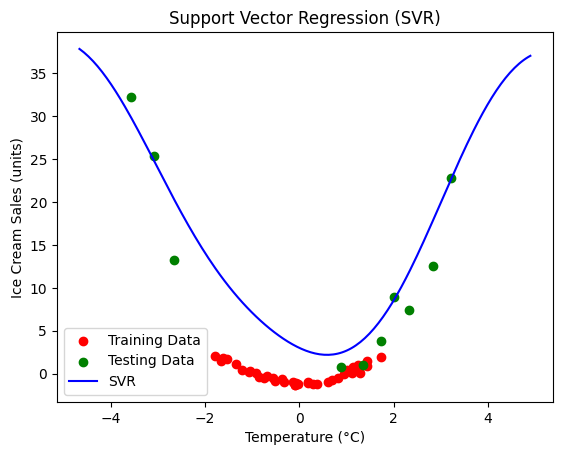

In [55]:

X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# Predict on the grid (remember: transform X, inverse-transform y)
y_grid_pred = sc_y.inverse_transform(
    regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)
)

# Scatter original data (training + testing, in original scale)
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot regression curve
plt.plot(X_grid, y_grid_pred, color='blue', label='SVR')

plt.title('Support Vector Regression (SVR)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()
